## Imports

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler


## Exploratory Data Analysis

In [3]:
%%time
df_train = pd.read_csv('~/Desktop/DMT/training_set_VU_DM.csv')

CPU times: user 30.5 s, sys: 9.56 s, total: 40.1 s
Wall time: 43 s


In [4]:
%%time
df_train.describe().transpose()

CPU times: user 19 s, sys: 6.5 s, total: 25.5 s
Wall time: 18.3 s


,count,mean,std,min,25%,50%,75%,max
srch_id,4958347.0,166366.561096,96112.230102,1.0000,82936.000000,166507.0000,249724.000000,3.327850e+05
site_id,4958347.0,9.953133,7.646890,1.0000,5.000000,5.0000,14.000000,3.400000e+01
visitor_location_country_id,4958347.0,175.340453,65.916249,1.0000,100.000000,219.0000,219.000000,2.310000e+02
visitor_hist_starrating,251866.0,3.374334,0.692519,1.4100,2.920000,3.4500,3.930000,5.000000e+00
visitor_hist_adr_usd,252988.0,176.022659,107.254493,0.0000,109.810000,152.2400,213.490000,1.958700e+03
prop_country_id,4958347.0,173.973897,68.345248,1.0000,100.000000,219.0000,219.000000,2.300000e+02
prop_id,4958347.0,70079.179496,40609.920378,1.0000,35010.000000,69638.0000,105168.000000,1.408210e+05
prop_starrating,4958347.0,3.180525,1.051024,0.0000,3.000000,3.0000,4.000000,5.000000e+00
prop_review_score,4950983.0,3.777777,1.050329,0.0000,3.500000,4.0000,4.500000,5.000000e+00
prop_brand_bool,4958347.0,0.634699,0.481514,0.0000,0.000000,1.0000,1.000000,1.000000e+00


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
srch_id                        int64
date_time                      object
site_id                        int64
visitor_location_country_id    int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                int64
prop_id                        int64
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                       int64
price_usd                      float64
promotion_flag                 int64
srch_destination_id            int64
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday_night_b

In [6]:
df_train.head(15)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
5,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,30184,4,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0,NaN,0
6,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,44147,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
7,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,50984,2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
8,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,53341,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,6.0,0,NaN,0
9,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,56880,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [7]:
temp = Counter(df_train.srch_id)

In [8]:
print('Total number of queries/user searches:', len(temp))
print(
    'Average number of properties shown per search: %.2f' % (len(df_train) / len(temp)))


Total number of queries/user searches: 199795
Average number of properties shown per search: 24.82


In [9]:
temp = [
    x for x in Counter(df_train[df_train.click_bool == 1]['srch_id']).values() if x > 1
]


In [10]:
print('Number of user queries with more than one click: ', len(temp))
print('Which is around %.2f%% of the total number of queries' %
      (len(temp) / 199795 * 100))


Number of user queries with more than one click:  13031
Which is around 6.52% of the total number of queries


Let's see how unbalanced the dataset is

In [11]:
temp = df_train.click_bool.value_counts()
print('Class 0:', temp[0])
print('Class 1:', temp[1])
print('Proportion:', round(temp[0] / temp[1], 2), ': 1')


Class 0: 4736468
Class 1: 221879
Proportion: 21.35 : 1


In [12]:
sns.set(
    style='whitegrid',
    palette='Set2',
    font_scale=1.4,
    rc={"figure.figsize": [10, 6]})


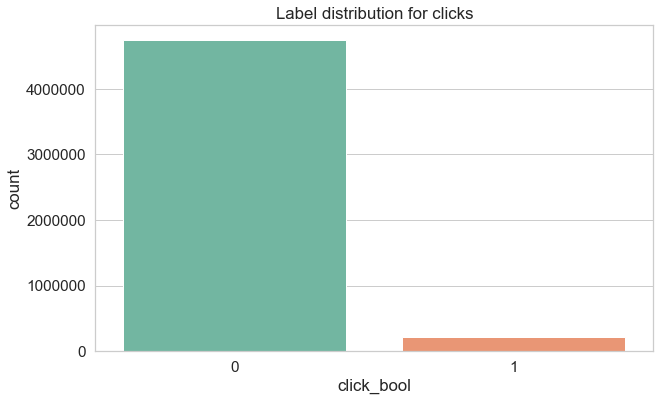

In [13]:
sns.countplot(df_train.click_bool)
plt.title('Label distribution for clicks')
plt.show()

## Resampling

As we can see the datset is highly unbalanced. To deal with it we can use resampling. For this wwe can either perform over-sampling or under-sampling.

The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

In [14]:
%%time
y = df_train.click_bool.values
X = df_train.drop(['click_bool'], axis=1).values

CPU times: user 15 s, sys: 20.7 s, total: 35.6 s
Wall time: 42.1 s


In [15]:
print(X.shape, y.shape)

(4958347, 53) (4958347,)


In [16]:
Counter(y)

Counter({0: 4736468, 1: 221879})

In [17]:
%%time
model = RandomUnderSampler(random_state=42, sampling_strategy='majority')
X, y = model.fit_resample(X, y)

CPU times: user 26.9 s, sys: 1min 21s, total: 1min 48s
Wall time: 2min 31s


In [18]:
print(X.shape, y.shape)

(443758, 53) (443758,)


In [19]:
Counter(y)

Counter({0: 221879, 1: 221879})

In [20]:
%%time
X = pd.DataFrame(
    X,
    columns=df_train.drop(['click_bool'], axis=1).columns)

y = pd.DataFrame(y, columns=['click_bool'])


CPU times: user 5.87 s, sys: 15.3 s, total: 21.1 s
Wall time: 25.1 s


In [23]:
X = X.join(y)

In [26]:
%%time
X.to_csv('~/Desktop/DMT/train_reduced.csv')

CPU times: user 15.5 s, sys: 20.2 s, total: 35.7 s
Wall time: 41.8 s
